![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [13]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

**Load Global Workout Interest Data**

In [14]:
# Load the global workout trends
workout = pd.read_csv("data/workout.csv")
workout.head()

month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51

**Find the Peak Time for "Workout" Searches**

In [15]:
# Find the row with the highest popularity index
peak_row = workout.loc[workout['workout_worldwide'].idxmax()]
year_str = peak_row['month'][:4]  # Format: "yyyy"
print("Peak workout interest year:", year_str)

Peak workout interest year: 2020


**Analyze Keyword Popularity During COVID and Now**

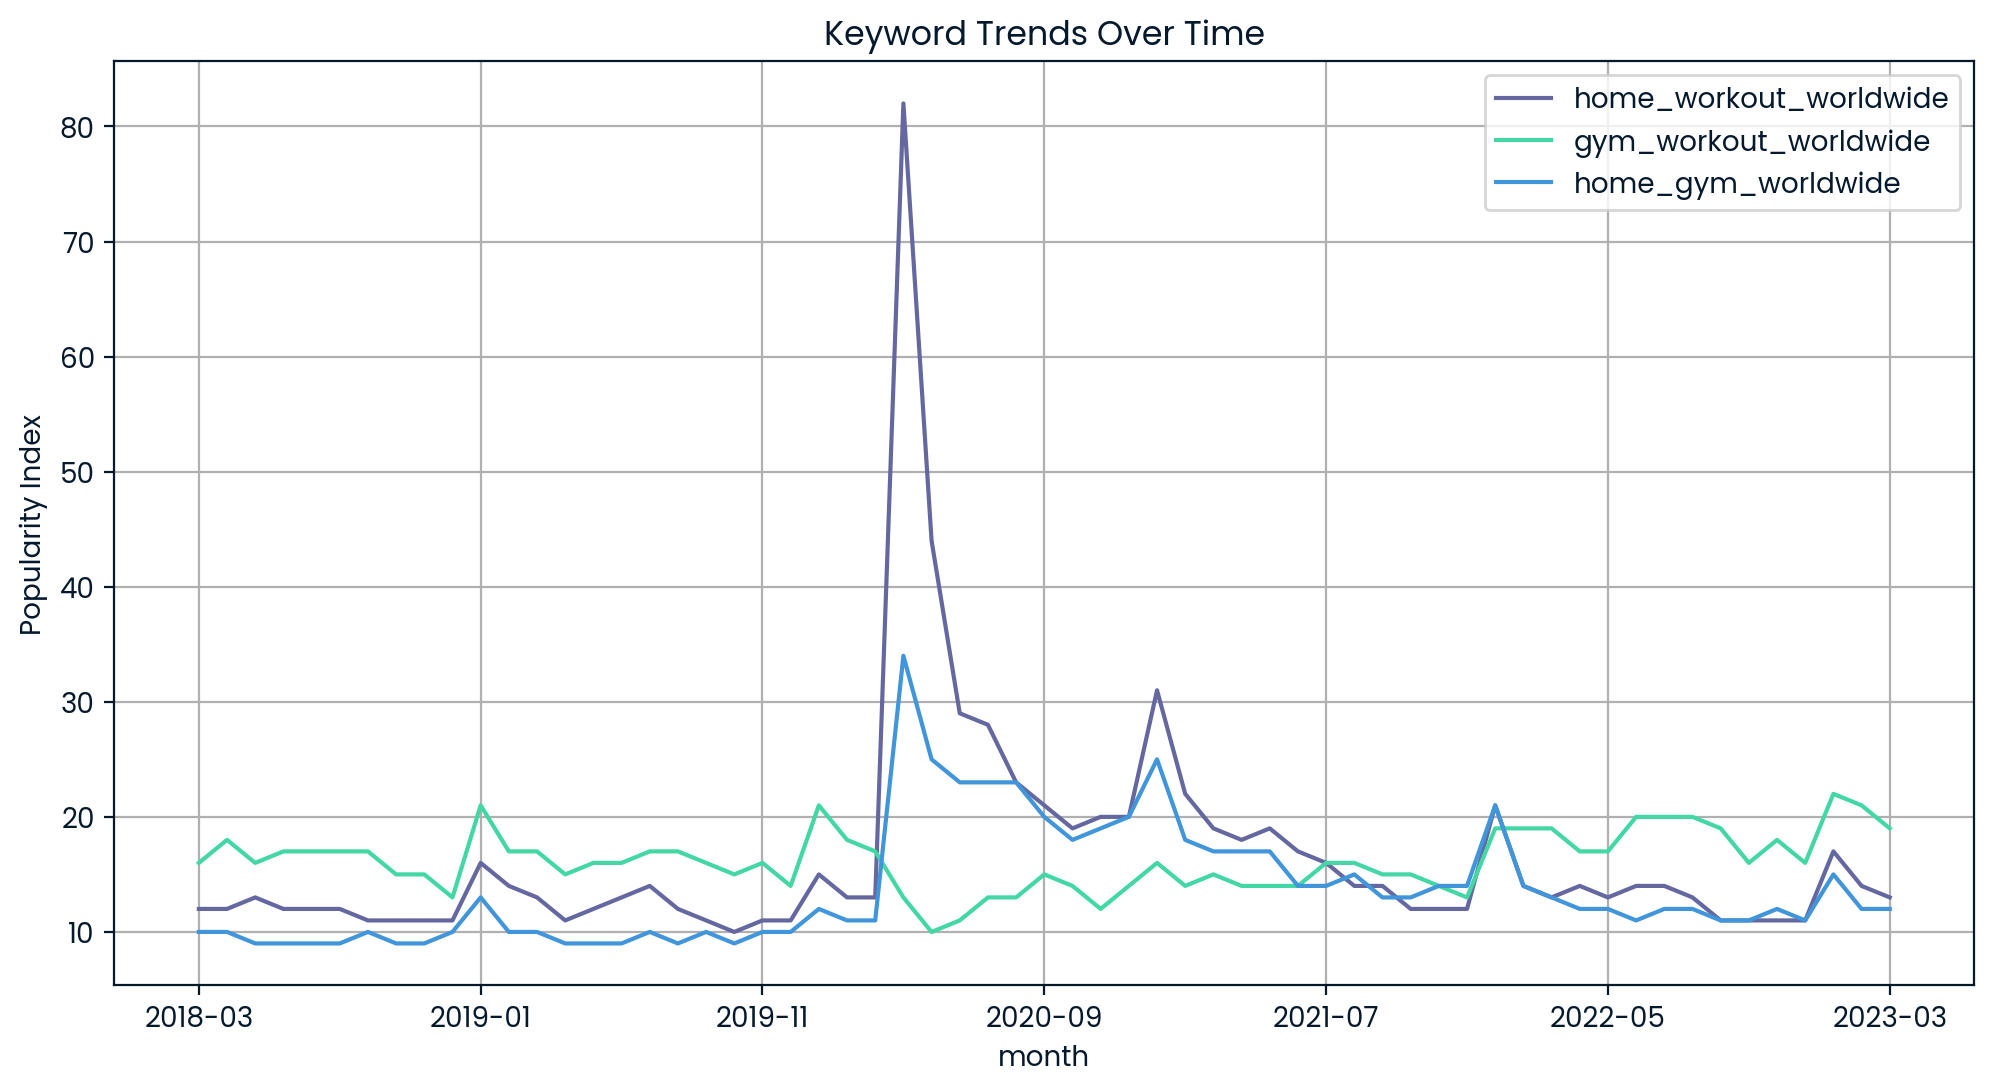

Most popular keyword during COVID: home_workout_worldwide
Most popular keyword now: gym_workout_worldwide


In [16]:
# Load trends for three keywords
three_keywords = pd.read_csv("data/three_keywords.csv")

# Plot the trends
three_keywords.plot(x='month', figsize=(12,6), title="Keyword Trends Over Time")
plt.ylabel("Popularity Index")
plt.grid(True)
plt.show()

# COVID period: 2020–2021
covid_period = three_keywords[three_keywords['month'].between("2020-01", "2021-12")]
avg_covid = covid_period[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean()

peak_covid = avg_covid.idxmax()

# Current period: 2023
current_period = three_keywords[three_keywords['month'].str.startswith("2023")]
avg_current = current_period[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean()

current = avg_current.idxmax()

print("Most popular keyword during COVID:", peak_covid)
print("Most popular keyword now:", current)

**Highest Workout Interest Among Selected Countries**


In [17]:
# Load geo-based workout data
workout_geo = pd.read_csv("data/workout_geo.csv")

# Filter for selected countries
selected = workout_geo[workout_geo['country'].isin(['United States', 'Australia', 'Japan'])]

# Find the country with the highest interest
top_country = selected.sort_values(by='workout_2018_2023', ascending=False).iloc[0]['country']
print("Country with highest workout interest:", top_country)

Country with highest workout interest: United States


**Compare Philippines and Malaysia on Home Workouts**


In [18]:
# Load keyword geo data
three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")

# Check the column names to avoid similar errors in the future
print("Columns available:", three_keywords_geo.columns)

# Use the correct column name 'Country'
ph_my = three_keywords_geo[three_keywords_geo['Country'].isin(['Philippines', 'Malaysia'])]

# Determine which country has higher home workout interest
home_workout_geo = ph_my.sort_values(by='home_workout_2018_2023', ascending=False).iloc[0]['Country']
print("Best country to expand home workouts:", home_workout_geo)


Columns available: Index(['Country', 'home_workout_2018_2023', 'gym_workout_2018_2023',
       'home_gym_2018_2023'],
      dtype='object')
Best country to expand home workouts: Philippines


**Summary of Variables**
- year_str: year of peak global interest in "workout"
- peak_covid: most popular keyword during the COVID pandemic
- current: most popular keyword currently (2023)
- top_country: top country for "workout" interest among US, Australia, and Japan
- home_workout_geo: country with higher interest in "home workout" between Philippines and Malaysia